In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from os import path
import pandas as pd
import matplotlib.ticker as ticker
from scipy import stats
import itertools

data_dir = path.join("/home/harka424/Documents/COSC490/Stemming/Data","trec")
save_dir = "/home/harka424/Documents/COSC490/cosc490_report/figures"
labels = ["paiceHusk", "krovetz", "sStripping", "porter2", "lovins", "wikt", "none"]
labels_title = ["Paice/Husk", "Krovetz", "S-Stripping", "Porter2", "Lovins", "Wikt", "None"]

MARKERS = ["o","^","s","*","d", "P", "X"]
marker = itertools.cycle(MARKERS)

In [7]:
SMALL_SIZE = 11
MEDIUM_SIZE = 12
BIGGER_SIZE = 14

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

## Preparing Data

In [8]:
df_list = list()

for i in range(1,9):
    df = pd.read_csv(path.join(data_dir,f"map_TREC-{i}"), sep="\\s+")
    df["collection"] = f"TREC-{i}"
    df_list.append(df)

data = pd.concat(df_list, ignore_index=True)

data_avg = data[data["qid"] == "all"]
data = data.drop(data[data["qid"] == "all"].index)

## MAP

In [9]:
for i in range (1,9):
    target = data_avg[data_avg["collection"] == f"TREC-{i}"]
    # display(target)

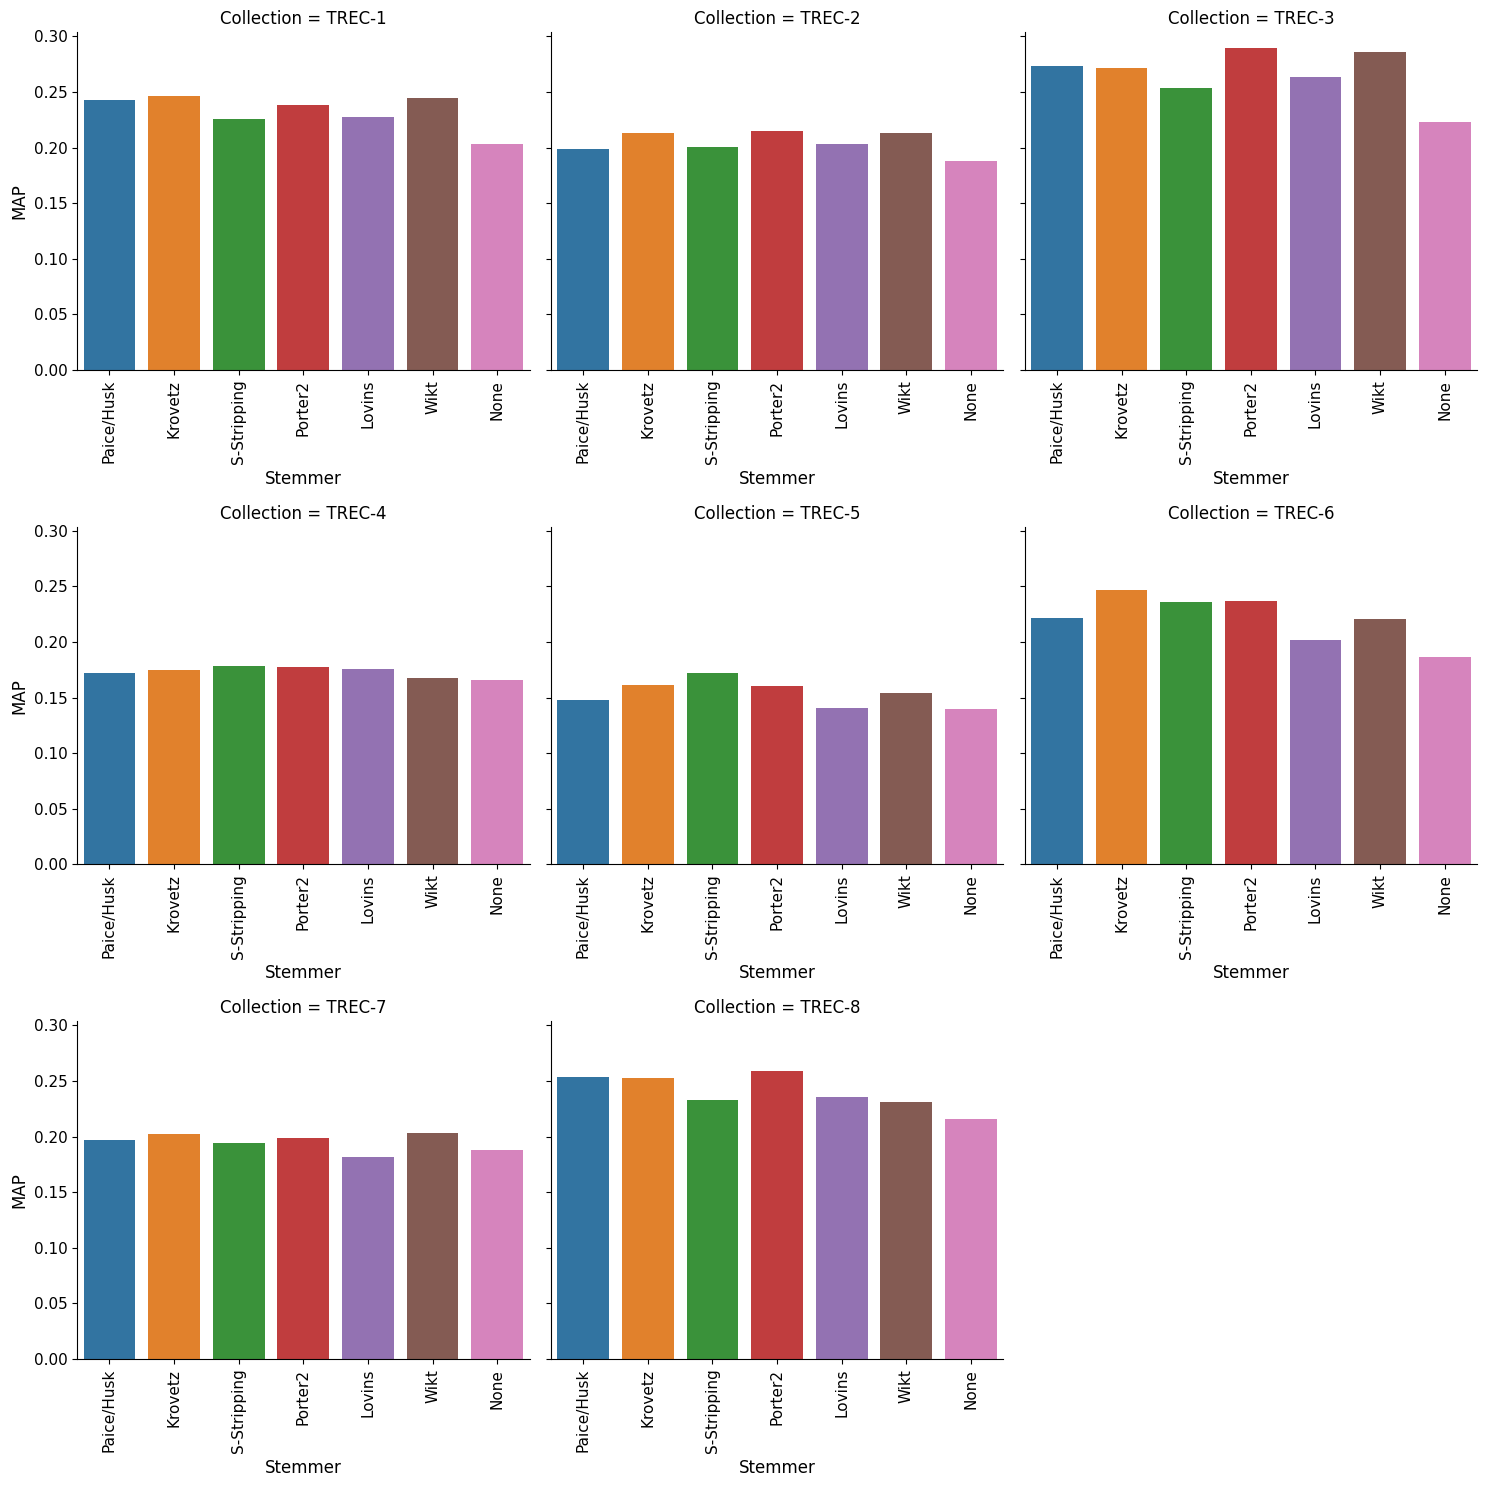

In [10]:
graph = sns.catplot(data=data_avg, kind="bar", x="stemmer", hue="stemmer", y="map", col="collection", col_wrap=3, sharex=False)
graph.set_titles(col_template="Collection = {col_name}")
graph.set(ylabel="MAP",xlabel="Stemmer")
for ax in graph.axes:
    ax.xaxis.set_major_locator(ticker.FixedLocator(ax.get_xticks()))
    ax.set_xticklabels(labels_title)
    ax.tick_params(axis='x', labelrotation=90)
plt.tight_layout()
plt.show()
graph.savefig(f"{save_dir}/figure15.eps",dpi=1200)


# axes = sns.catplot(data=data, kind="bar", x="stemmer", hue="stemmer", y="map", col="collection", col_wrap=3, sharex=False)
# plt.show()

In [15]:
target = data[data["collection"] == "TREC-4"]
import scipy.stats
s = target[target["stemmer"] == "porter2"].loc[:,"map"].tolist()
t = target[target["stemmer"] == "none"].loc[:,"map"].tolist()
stats.ttest_rel(s,t)

TtestResult(statistic=1.6711578426486795, pvalue=0.10106621047471313, df=49)

In [24]:
target = data_avg[data_avg["stemmer"] != "none"]
target = target[target["stemmer"] != "wikt"]
averages = list()
for stemmer in labels[:-2]:
    fmeasures = np.loadtxt(f"/home/katelyn/Documents/COSC490/Stemming/Data/wikt/{stemmer}_cluster_fmeasures.csv")
    averages.append(fmeasures.mean())
fmeasures = list()
for i in range (1,9):
    fmeasures.extend(averages)
target = target.assign(fmeasure=fmeasures)

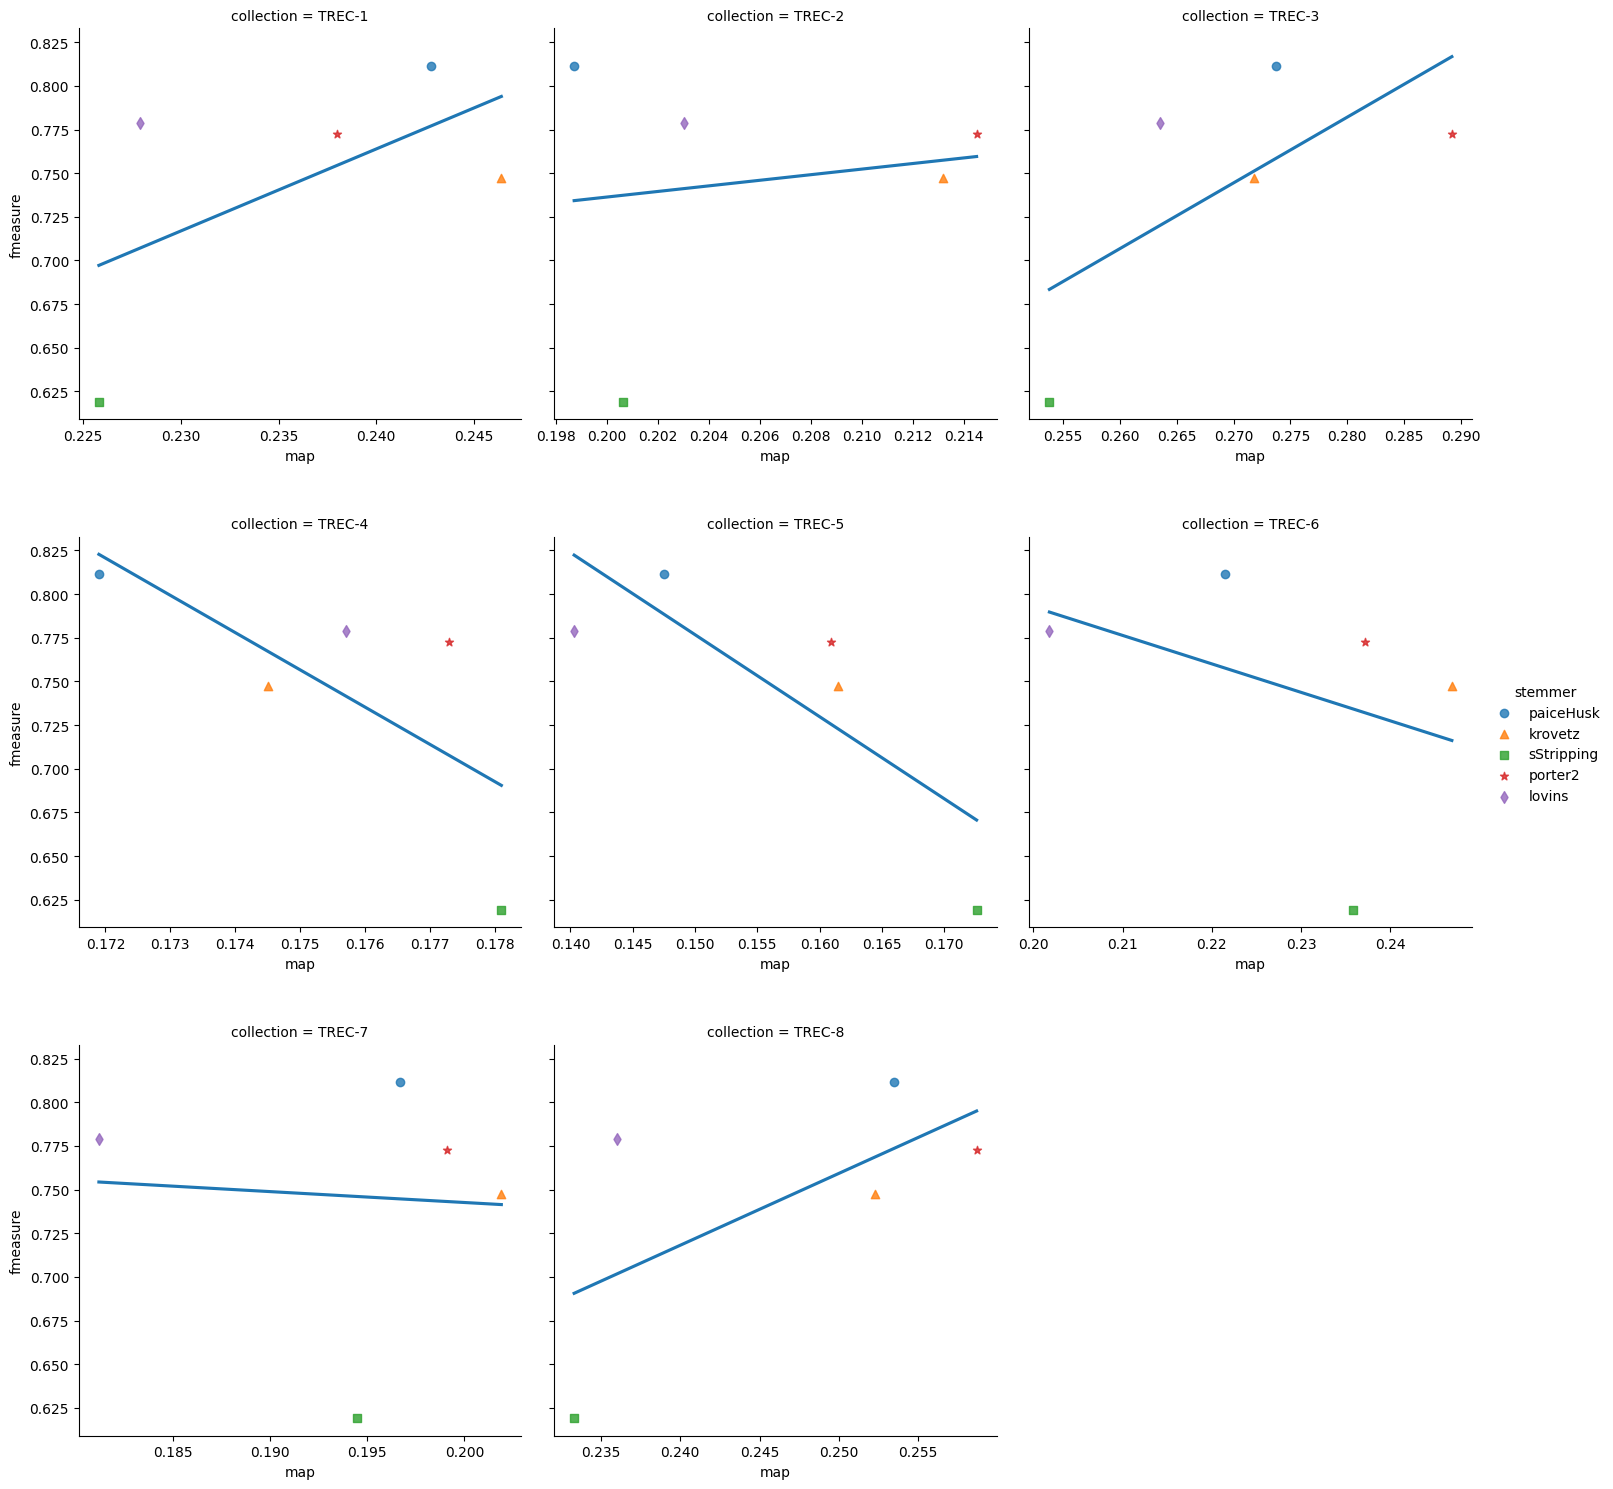

In [25]:
graph = sns.lmplot(target, x="map", y="fmeasure", hue="stemmer", markers=MARKERS[:-2], col="collection", col_wrap=3, facet_kws={"sharex": False}, fit_reg=False)

for collection, ax in zip(np.unique(data_avg["collection"]), graph.axes):
    target_data = target[target["collection"] == collection]
    sns.regplot(target_data, x="map", y="fmeasure", scatter=False, ci=None, ax=ax)
plt.subplots_adjust(hspace=0.3)
plt.show()

In [26]:
print("size pearson-R p-value")
for i in range (1,9):
    x = target[target["collection"] == f"TREC-{i}"]["map"].to_numpy()
    y = target[target["collection"] == f"TREC-{i}"]["fmeasure"].to_numpy()
    print(f"{i} {stats.pearsonr(x,y).statistic:.3f} {stats.pearsonr(x,y).pvalue:.3f}")

size pearson-R p-value
1 0.571 0.314
2 0.158 0.800
3 0.664 0.221
4 -0.702 0.186
5 -0.803 0.102
6 -0.384 0.523
7 -0.067 0.914
8 0.627 0.258


## Statistical Significance

### TREC-1

In [4]:
target_data = data[data["collection"] == "TREC-1"]

s = target_data[target_data["stemmer"] == "porter2"].loc[:,"map"].tolist()
n = target_data[target_data["stemmer"] == "none"].loc[:,"map"].tolist()
print(f"{stats.ttest_rel(s,n)}")
s = target_data[target_data["stemmer"] == "paiceHusk"].loc[:,"map"].tolist()
n = target_data[target_data["stemmer"] == "none"].loc[:,"map"].tolist()
print(f"{stats.ttest_rel(s,n)}")
s = target_data[target_data["stemmer"] == "porter2"].loc[:,"map"].tolist()
n = target_data[target_data["stemmer"] == "paiceHusk"].loc[:,"map"].tolist()
print(f"{stats.ttest_rel(s,n)}")
s = target_data[target_data["stemmer"] == "wikt"].loc[:,"map"].tolist()
n = target_data[target_data["stemmer"] == "none"].loc[:,"map"].tolist()
print(f"{stats.ttest_rel(s,n)}")

TtestResult(statistic=2.937409642906547, pvalue=0.005031838619049033, df=49)
TtestResult(statistic=2.6920501793676026, pvalue=0.009690163701155515, df=49)
TtestResult(statistic=-0.44928694002116193, pvalue=0.6552057043469801, df=49)
TtestResult(statistic=3.3213617652216936, pvalue=0.0016982464266091675, df=49)


### TREC-2

In [5]:
target_data = data[data["collection"] == "TREC-2"]

s = target_data[target_data["stemmer"] == "porter2"].loc[:,"map"].tolist()
n = target_data[target_data["stemmer"] == "none"].loc[:,"map"].tolist()
print(f"{stats.ttest_rel(s,n)}")
s = target_data[target_data["stemmer"] == "paiceHusk"].loc[:,"map"].tolist()
n = target_data[target_data["stemmer"] == "none"].loc[:,"map"].tolist()
print(f"{stats.ttest_rel(s,n)}")
s = target_data[target_data["stemmer"] == "porter2"].loc[:,"map"].tolist()
n = target_data[target_data["stemmer"] == "paiceHusk"].loc[:,"map"].tolist()
print(f"{stats.ttest_rel(s,n)}")
s = target_data[target_data["stemmer"] == "wikt"].loc[:,"map"].tolist()
n = target_data[target_data["stemmer"] == "none"].loc[:,"map"].tolist()
print(f"{stats.ttest_rel(s,n)}")

TtestResult(statistic=2.5441212264586617, pvalue=0.014158587305959043, df=49)
TtestResult(statistic=0.9547706376583845, pvalue=0.3443804232091614, df=49)
TtestResult(statistic=1.962328767283176, pvalue=0.05541608602650192, df=49)
TtestResult(statistic=2.8161423788922106, pvalue=0.006984354288808727, df=49)


### TREC-3

In [6]:
target_data = data[data["collection"] == "TREC-3"]

s = target_data[target_data["stemmer"] == "porter2"].loc[:,"map"].tolist()
n = target_data[target_data["stemmer"] == "none"].loc[:,"map"].tolist()
print(f"{stats.ttest_rel(s,n)}")
s = target_data[target_data["stemmer"] == "paiceHusk"].loc[:,"map"].tolist()
n = target_data[target_data["stemmer"] == "none"].loc[:,"map"].tolist()
print(f"{stats.ttest_rel(s,n)}")
s = target_data[target_data["stemmer"] == "porter2"].loc[:,"map"].tolist()
n = target_data[target_data["stemmer"] == "paiceHusk"].loc[:,"map"].tolist()
print(f"{stats.ttest_rel(s,n)}")
s = target_data[target_data["stemmer"] == "wikt"].loc[:,"map"].tolist()
n = target_data[target_data["stemmer"] == "none"].loc[:,"map"].tolist()
print(f"{stats.ttest_rel(s,n)}")

TtestResult(statistic=3.69199040860706, pvalue=0.0005592870891695457, df=49)
TtestResult(statistic=2.6687480029577775, pvalue=0.01029501930815044, df=49)
TtestResult(statistic=1.4690861470434573, pvalue=0.14820079080763734, df=49)
TtestResult(statistic=3.152327997003092, pvalue=0.0027633237965287963, df=49)


### TREC-4

In [7]:
target_data = data[data["collection"] == "TREC-4"]

s = target_data[target_data["stemmer"] == "porter2"].loc[:,"map"].tolist()
n = target_data[target_data["stemmer"] == "none"].loc[:,"map"].tolist()
print(f"{stats.ttest_rel(s,n)}")
s = target_data[target_data["stemmer"] == "paiceHusk"].loc[:,"map"].tolist()
n = target_data[target_data["stemmer"] == "none"].loc[:,"map"].tolist()
print(f"{stats.ttest_rel(s,n)}")
s = target_data[target_data["stemmer"] == "porter2"].loc[:,"map"].tolist()
n = target_data[target_data["stemmer"] == "paiceHusk"].loc[:,"map"].tolist()
print(f"{stats.ttest_rel(s,n)}")
s = target_data[target_data["stemmer"] == "wikt"].loc[:,"map"].tolist()
n = target_data[target_data["stemmer"] == "none"].loc[:,"map"].tolist()
print(f"{stats.ttest_rel(s,n)}")

TtestResult(statistic=1.6711578426486795, pvalue=0.10106621047471313, df=49)
TtestResult(statistic=0.9489478784164783, pvalue=0.34730409305090804, df=49)
TtestResult(statistic=1.2329424583759272, pvalue=0.2234797824761604, df=49)
TtestResult(statistic=0.17721132155289118, pvalue=0.8600729080615745, df=49)


### TREC-5

In [8]:
target_data = data[data["collection"] == "TREC-5"]

s = target_data[target_data["stemmer"] == "porter2"].loc[:,"map"].tolist()
n = target_data[target_data["stemmer"] == "none"].loc[:,"map"].tolist()
print(f"{stats.ttest_rel(s,n)}")
s = target_data[target_data["stemmer"] == "paiceHusk"].loc[:,"map"].tolist()
n = target_data[target_data["stemmer"] == "none"].loc[:,"map"].tolist()
print(f"{stats.ttest_rel(s,n)}")
s = target_data[target_data["stemmer"] == "porter2"].loc[:,"map"].tolist()
n = target_data[target_data["stemmer"] == "paiceHusk"].loc[:,"map"].tolist()
print(f"{stats.ttest_rel(s,n)}")
s = target_data[target_data["stemmer"] == "wikt"].loc[:,"map"].tolist()
n = target_data[target_data["stemmer"] == "none"].loc[:,"map"].tolist()
print(f"{stats.ttest_rel(s,n)}")

TtestResult(statistic=1.2636109014145962, pvalue=0.212348649927879, df=49)
TtestResult(statistic=0.409204901558352, pvalue=0.6841725125747876, df=49)
TtestResult(statistic=1.6583612780335548, pvalue=0.10363348361741456, df=49)
TtestResult(statistic=1.175115768820371, pvalue=0.24562717874912662, df=49)


### TREC-6

In [13]:
target_data = data[data["collection"] == "TREC-6"]

s = target_data[target_data["stemmer"] == "porter2"].loc[:,"map"].tolist()
n = target_data[target_data["stemmer"] == "none"].loc[:,"map"].tolist()
print(f"{stats.ttest_rel(s,n)}")
s = target_data[target_data["stemmer"] == "paiceHusk"].loc[:,"map"].tolist()
n = target_data[target_data["stemmer"] == "none"].loc[:,"map"].tolist()
print(f"{stats.ttest_rel(s,n)}")
s = target_data[target_data["stemmer"] == "porter2"].loc[:,"map"].tolist()
n = target_data[target_data["stemmer"] == "paiceHusk"].loc[:,"map"].tolist()
print(f"{stats.ttest_rel(s,n)}")
s = target_data[target_data["stemmer"] == "wikt"].loc[:,"map"].tolist()
n = target_data[target_data["stemmer"] == "none"].loc[:,"map"].tolist()
print(f"{stats.ttest_rel(s,n)}")

TtestResult(statistic=2.367236907582492, pvalue=0.021915124775745885, df=49)
TtestResult(statistic=1.6181269448421298, pvalue=0.11205521311507394, df=49)
TtestResult(statistic=1.1779973297796966, pvalue=0.24448725254237502, df=49)
TtestResult(statistic=1.5206593569250526, pvalue=0.1347726171186612, df=49)


### TREC-7

In [10]:
target_data = data[data["collection"] == "TREC-7"]

s = target_data[target_data["stemmer"] == "porter2"].loc[:,"map"].tolist()
n = target_data[target_data["stemmer"] == "none"].loc[:,"map"].tolist()
print(f"{stats.ttest_rel(s,n)}")
s = target_data[target_data["stemmer"] == "paiceHusk"].loc[:,"map"].tolist()
n = target_data[target_data["stemmer"] == "none"].loc[:,"map"].tolist()
print(f"{stats.ttest_rel(s,n)}")
s = target_data[target_data["stemmer"] == "porter2"].loc[:,"map"].tolist()
n = target_data[target_data["stemmer"] == "paiceHusk"].loc[:,"map"].tolist()
print(f"{stats.ttest_rel(s,n)}")
s = target_data[target_data["stemmer"] == "wikt"].loc[:,"map"].tolist()
n = target_data[target_data["stemmer"] == "none"].loc[:,"map"].tolist()
print(f"{stats.ttest_rel(s,n)}")

TtestResult(statistic=0.7730334612146278, pvalue=0.4432157836591111, df=49)
TtestResult(statistic=0.6050130651623479, pvalue=0.5479621206762022, df=49)
TtestResult(statistic=0.6720145936184063, pvalue=0.5047308211262591, df=49)
TtestResult(statistic=1.028352325487789, pvalue=0.3088338087879951, df=49)


### TREC-8

In [11]:
target_data = data[data["collection"] == "TREC-8"]

s = target_data[target_data["stemmer"] == "porter2"].loc[:,"map"].tolist()
n = target_data[target_data["stemmer"] == "none"].loc[:,"map"].tolist()
print(f"{stats.ttest_rel(s,n)}")
s = target_data[target_data["stemmer"] == "paiceHusk"].loc[:,"map"].tolist()
n = target_data[target_data["stemmer"] == "none"].loc[:,"map"].tolist()
print(f"{stats.ttest_rel(s,n)}")
s = target_data[target_data["stemmer"] == "porter2"].loc[:,"map"].tolist()
n = target_data[target_data["stemmer"] == "paiceHusk"].loc[:,"map"].tolist()
print(f"{stats.ttest_rel(s,n)}")
s = target_data[target_data["stemmer"] == "wikt"].loc[:,"map"].tolist()
n = target_data[target_data["stemmer"] == "none"].loc[:,"map"].tolist()
print(f"{stats.ttest_rel(s,n)}")

TtestResult(statistic=3.3573138328272276, pvalue=0.0015286506512683226, df=49)
TtestResult(statistic=2.5833344922035226, pvalue=0.012819987320318912, df=49)
TtestResult(statistic=0.8280017164039885, pvalue=0.41168427402071384, df=49)
TtestResult(statistic=0.8800981894703591, pvalue=0.3831022975240258, df=49)
